In [1]:
# Import missingno so that I can analyse missing data 
import missingno as msno

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualisation
import matplotlib.pyplot as plt # needed for visualisation 
import math
import random
from scipy import stats
import warnings

# Libraries for data preparation and model building
from sklearn.metrics import mean_absolute_error, mean_squared_error 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

warnings.filterwarnings(action='once')

## 2. Loading the Data

In [3]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

## 3. Exploratory Data Analysis (EDA)

In [4]:

print(f'Shape: {df_train.shape}')
display(df_train.head(3))

Shape: (8763, 49)


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667


Third look at the information around the colums - type missing values etc, this identifies that we have 3 columns that are objects 

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Look at the descriptive statistics for the dataset.

In [6]:
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000



## 4. Feature Engineering

#### 4.1.1 Identify missing values 

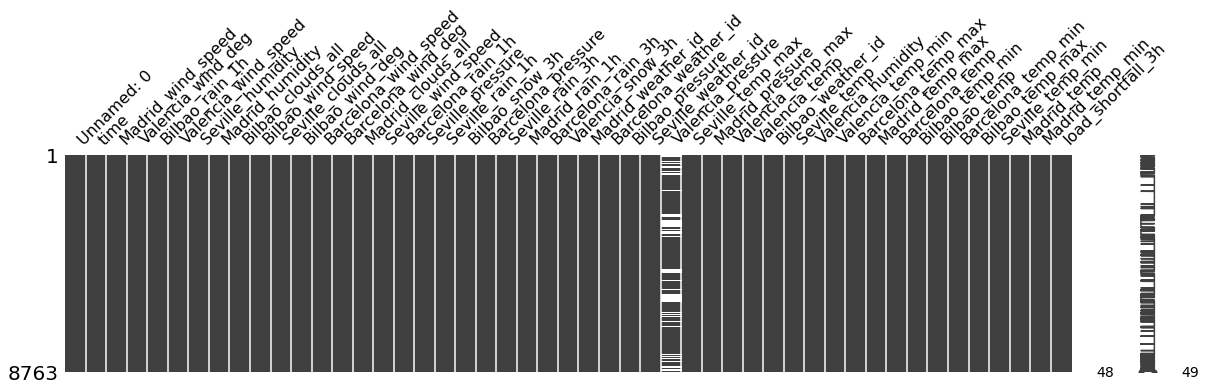

In [7]:
msno.matrix(df_train, figsize=(20, 4))
plt.show()

#### 4.1.4 Amend existing features

No 1 - Replace the nulls in Valencia_pressure with the mode

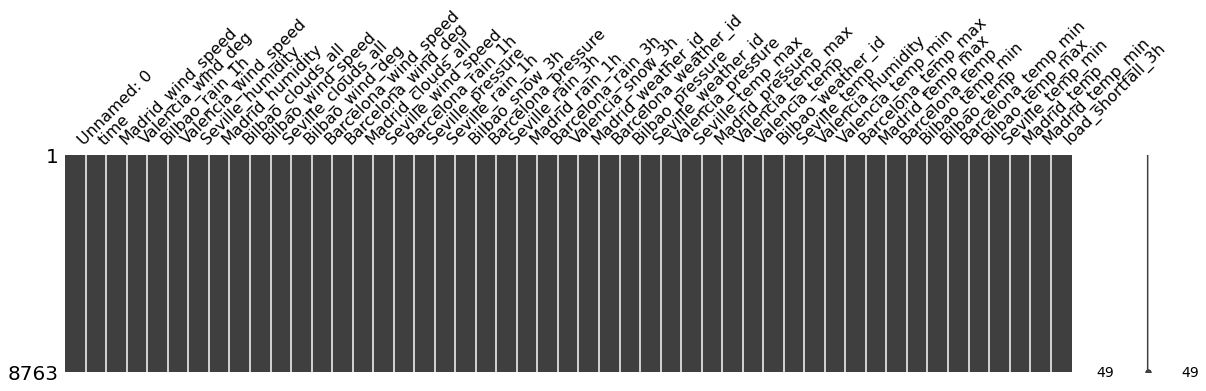

In [8]:
def clean_valencia_pressure(data:pd.DataFrame) -> pd.DataFrame:
    """Replace the nulls in Valencia_pressure with the mode"""
    df_clean = data.copy()

    vp_training_mode=df_clean['Valencia_pressure'].mean() #mode add[0] for first mode
    df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(vp_training_mode)

    return df_clean

# clean the valencia pressure
df_clean = clean_valencia_pressure(df_train)
msno.matrix(df_clean, figsize=(20, 4))
plt.show()

No 2 - Convert time object to date time and convert object Valencia wind degrees by striping string & convert to numerical

In [9]:
def clean_datatypes(data:pd.DataFrame) -> pd.DataFrame:
    """Set the columns to the correct datatypes"""
    df_clean = data.copy()
    df_clean['time'] = pd.to_datetime(df_clean['time'])

    return df_clean

# clean the datatypes
df_clean = clean_datatypes(df_clean)

print('Time Conversion')
display(df_clean[['time']].head())    

print('Data Types')
display(df_clean.dtypes.head(5))

Time Conversion


,time
0,2015-01-01 03:00:00
1,2015-01-01 06:00:00
2,2015-01-01 09:00:00
3,2015-01-01 12:00:00
4,2015-01-01 15:00:00


Data Types


Unnamed: 0                    int64
time                 datetime64[ns]
Madrid_wind_speed           float64
Valencia_wind_deg            object
Bilbao_rain_1h              float64
dtype: object

In [10]:
def clean_valencia_wind(data:pd.DataFrame) -> pd.DataFrame:
    """Clean Valencia wind degrees by striping string & convert to numerical """
    df_clean = data.copy()

    df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\\d+)')
    df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

    return df_clean

# clean valencia wind
df_clean = clean_valencia_wind(df_clean)

print('Valencia Wind')
display(df_clean[['Valencia_wind_deg']].head())

print('Cleaned Data')
display(df_clean.head())

Valencia Wind


,Valencia_wind_deg
0,5
1,10
2,9
3,8
4,7


Cleaned Data


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [11]:
def clean_seville_pressure(data:pd.DataFrame) -> pd.DataFrame:
    """Remove non-numeric values"""
    df_clean = data.copy()

    df_clean['Seville_pressure'] = df_clean['Seville_pressure'] \
        .str.extract('(\\d+)') \
        .astype(float)

    return df_clean

#### 4.1.5 Create New features

No 1 - Split date into day time year etc 

In [12]:
def add_date_features(data:pd.DataFrame) -> pd.DataFrame:
    """Split the date into its separate parts (years, mont, etc.)"""
    df_clean = data.copy()

    df_clean['Year'] = df_clean['time'].dt.year
    df_clean['Month'] = df_clean['time'].dt.month
    df_clean['Day'] = df_clean['time'].dt.day
    df_clean['Hour'] = df_clean['time'].dt.hour
    df_clean['Day_of_week'] = df_clean['time'].dt.dayofweek

    return df_clean

# add the data features
df_clean = add_date_features(df_clean)
display(df_clean.head(3))

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Day_of_week
0,0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,3
1,1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6,3
2,2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,...,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9,3


No2 - Remove Features (index and time)

> for now I am going to keep time

In [13]:
def clean_unused_columns(data:pd.DataFrame) -> pd.DataFrame:
    """Remove unused columns from the dataset"""
    df_clean = data.copy()

    # remove id columns
    id_columns =  [
        'Madrid_weather_id',
        'Barcelona_weather_id',
        'Seville_weather_id',
        'Bilbao_weather_id',       
    ]

    df_clean.drop(columns=id_columns, inplace=True)
    
    
    #df_clean = df_clean.drop(['Unnamed: 0' , 'time'], axis = 1)
    df_clean.drop(columns=['Unnamed: 0'], inplace=True)

    return df_clean

# remove the unused columns
df_clean = clean_unused_columns(df_clean)
display(df_clean.head(3))

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Day_of_week
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,3
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6,3
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9,3


No 3 - Add Season and weekday/ weekend, and add season

In [14]:
def add_season_feature(data:pd.DataFrame) -> pd.DataFrame:
    """Add a season feature based on the month."""
    df_clean = data.copy()

    # coding for the seasons
    season = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}

    season_list = []
    for month in df_clean['Month']:           
        season_list.append(season.get(month))

    df_clean['Season'] = season_list

    return df_clean

# add the season feature
df_clean = add_season_feature(df_clean)

print('Seasons in Dataset')
display(df_clean[['Month', 'Season']].drop_duplicates())

print('Updated Dataset')
display(df_clean.head(3))

Seasons in Dataset


,Month,Season
0,1,Winter
245,2,Winter
467,3,Spring
715,4,Spring
955,5,Spring
1203,6,Summer
1443,7,Summer
1691,8,Summer
1939,9,Autumn
2179,10,Autumn


Updated Dataset


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Day_of_week,Season
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,3,Winter
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6,3,Winter
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9,3,Winter


> This is a note for similar functions you have like this with the for loop: Doing a loop here is not very efficient, it will waste a lot of time if you have a large dataset. Look at the `apply` methods with `lambda` functions for the future. For now it is ok to skip this complication.

In [15]:
def add_day_features(data:pd.DataFrame) -> pd.DataFrame:
    """Add a feature to indicate if it is a weekday"""
    df_clean = data.copy()
    day_type = []

    for day in df_clean['Day_of_week']:
        daytype = {
            0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday',
            4: 'Weekday', 5: 'Weekend', 6: 'Weekend'}

        day_type.append(daytype.get(day))

    df_clean['Day_type'] = day_type

    return df_clean

# add the day features
df_clean = add_day_features(df_clean)

print('Day_of_week in Dataset')
display(df_clean[['Day_of_week', 'Day_type']] \
    .drop_duplicates() \
    .sort_values(by='Day_of_week'))

print('Updated Dataset')
display(df_clean.head(3))

Day_of_week in Dataset


,Day_of_week,Day_type
31,0,Weekday
37,1,Weekday
45,2,Weekday
0,3,Weekday
7,4,Weekday
15,5,Weekend
23,6,Weekend


Updated Dataset


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Day_of_week,Season,Day_type
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,265.938000,6715.666667,2015,1,1,3,3,Winter,Weekday
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,266.386667,4171.666667,2015,1,1,6,3,Winter,Weekday
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,272.708667,272.708667,4274.666667,2015,1,1,9,3,Winter,Weekday


No4 - Get dummy variables for non numerical data 

> I am going to leave your features as is for now, but you should draw box plots for the numeric features and decide if you need to `clip` for outliers. I might try that later in the notebook or leave it to you as homework to see if it makes a difference.

In [16]:
df_features = pd.get_dummies(df_clean, drop_first=True)
df_features.head(3)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,Season_Spring,Season_Summer,Season_Winter,Day_type_Weekend
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0


> This was the main goal of defining all your code as functions in the sections above: We now have a single function you can re-use when making predictions without having to duplicate your code. Because we copy the dataset every time, this is also not very efficient, but it is quite clean uncomplicated code, so don't worry about that for now either.

In [17]:
def feature_engineering(data:pd.DataFrame) -> pd.DataFrame:
    """Clean the dataset and add the features"""
    df_clean = data.copy()

    # define categorical columns
    categorical_columns = [
        'Year', 'Month', 'Day', 'Hour', 
        'Day_of_week', 'Season', 'Day_type'
    ]

    # perform cleaning and feature engineering
    df_clean = clean_datatypes(df_clean)
    df_clean = clean_unused_columns(df_clean)

    df_clean = clean_valencia_pressure(df_clean)
    df_clean = clean_valencia_wind(df_clean)
    df_clean = clean_seville_pressure(df_clean)

    df_clean = add_date_features(df_clean)
    df_clean = add_season_feature(df_clean)
    df_clean = add_day_features(df_clean)

    return pd.get_dummies(
        df_clean, 
        drop_first=True)
    return pd.get_dummies(
        df_clean, 
        columns=categorical_columns,
        drop_first=True)

# clean the dataset and add new features
df_features = feature_engineering(df_train)
df_features.head(3)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,load_shortfall_3h,Year,Month,Day,Hour,Day_of_week,Season_Spring,Season_Summer,Season_Winter,Day_type_Weekend
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,6715.666667,2015,1,1,3,3,0,0,1,0
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,4171.666667,2015,1,1,6,3,0,0,1,0
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,4274.666667,2015,1,1,9,3,0,0,1,0


In [18]:
feature_engineering(df_train).head(3)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,load_shortfall_3h,Year,Month,Day,Hour,Day_of_week,Season_Spring,Season_Summer,Season_Winter,Day_type_Weekend
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,6715.666667,2015,1,1,3,3,0,0,1,0
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,4171.666667,2015,1,1,6,3,0,0,1,0
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,4274.666667,2015,1,1,9,3,0,0,1,0


## 5. Modelling

> We can see that calling dummies on the entire dataset is not the right thing to do, look at `Seville_pressure_sp10`.

In [19]:
all_columns = list(df_features.columns.values)
all_columns.remove('load_shortfall_3h')
all_columns.remove('time')

In [20]:
# create targets and features dataset
feature_list = all_columns

y = df_features[['load_shortfall_3h']]
X = df_features[feature_list]

Create a scalar and standardize the features for training.

In [21]:
# all the numeric features in the features dataset
numeric_features = [
    'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
    'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
    'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
    'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
    'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
    'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
    'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
    'Barcelona_rain_3h', 'Valencia_snow_3h', 'Bilbao_pressure',
    'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
    'Valencia_temp_max', 'Valencia_temp', 'Seville_temp',
    'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
    'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min',
    'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max',
    'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min'
]

# select only the numeric columns used for training
scale_columns = list(set(numeric_features) \
    .intersection(set(feature_list)))

In [22]:
# create the scalar that will also be used for inference
scaler = StandardScaler()
scaler.fit(X[scale_columns])

StandardScaler()

In [23]:
# standardize the numeric columns in the training features
X[scale_columns] = scaler.transform(X[scale_columns])
display(X.head(5))

/home/fouldsjo/.virtualenv/paula/lib64/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/fouldsjo/.virtualenv/paula/lib64/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_min,Year,Month,Day,Hour,Day_of_week,Season_Spring,Season_Summer,Season_Winter,Day_type_Weekend
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,-2.309892,2015,1,1,3,3,0,0,1,0
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,-2.261154,2015,1,1,6,3,0,0,1,0
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,...,-1.574407,2015,1,1,9,3,0,0,1,0
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,...,-0.576488,2015,1,1,12,3,0,0,1,0
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,...,-0.708665,2015,1,1,15,3,0,0,1,0


In [24]:
# split data
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.4)

> Great, I see you already know how to get the feature importance, I will use this same thing later when I add more features.

> ℹ️ Like we tried to do those line plots earlier to see if there is seasonality, it looks like this is definitely the case because your data features performs so well. Unfortunately that is also a little bit unfortunate to find out that the other features are not that great.

#### Model Evaluation Functions

In [25]:
evaluation_results = []

In [26]:
def show_evaluation(y_test, y_predict):
    # calculate the metrics
    mae = mean_absolute_error(y_test, y_predict) 
    mse = mean_squared_error(y_test, y_predict) 
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, y_predict)

    print(f'MAE: {mae:.3f}')     
    print(f'MSE: {mse:.3f}')
    print()

    print(f'RMSE: {rmse:.3f}')     
    print(f'R-squared: {r2:.4f}')

    return rmse, r2

In [27]:
def score_model(model, X, y):
    global evaluation_results

    # get the model predictions
    y_pred = model.predict(X)

    # show the evaluation metrics
    rmse, r2 = show_evaluation(y, y_pred)

    # add the evaluation metrics to the summary
    evaluation_results.append({
        'model': str(model),
        'rmse': rmse,
        'r2_score': r2
    })

#### Random Forest

/home/fouldsjo/.virtualenv/paula/lib64/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


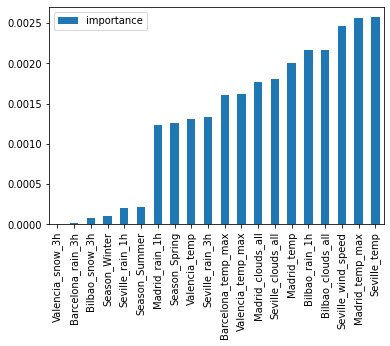

In [28]:
# Our forest consists of 100 trees with a max depth of 5 in this example
rf_model = RandomForestRegressor(n_estimators=100, max_depth=6)
rf_model.fit(x_train,y_train)

#Get the feature importances
feature_names = x_train.columns
feature_importance = pd.DataFrame(
    rf_model.feature_importances_, 
    index = feature_names,
    columns=['importance'])

feature_importance \
    .sort_values(by='importance') \
    .head(20) \
    .plot(kind = 'bar')
plt.show()

In [29]:
score_model(rf_model, x_test, y_test)

MAE: 2860.776
MSE: 12897042.958

RMSE: 3591.245
R-squared: 0.5093


#### Linear Regression

In [30]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
score_model(lr_model, x_test, y_test)


MAE: 3555.554
MSE: 20830874.944

RMSE: 4564.085
R-squared: 0.2075


#### Decision Tree

In [31]:
dt_model = DecisionTreeRegressor(random_state=PARAMETER_CONSTANT,max_depth=4, min_impurity_decrease=0.02)
dt_model.fit(x_train,y_train)
score_model(dt_model, x_test, y_test)

MAE: 3399.268
MSE: 18437672.449

RMSE: 4293.911
R-squared: 0.2985


#### Support Vector Regression

> ❗️ This is completely broken, but instead of trying to fix that, we can try easier things first.

In [32]:
sv_model = SVR(kernel='rbf', gamma='auto')
sv_model.fit(x_train, np.ravel(y_train))
score_model(sv_model, x_test, y_test)

MAE: 4090.595
MSE: 26261392.738

RMSE: 5124.587
R-squared: 0.0008


In [33]:
# evaluate one or more ML models
lr_preds = lr_model.predict(x_test)
tree_preds = dt_model.predict(x_test)
sv_preds = sv_model.predict(x_test)
rf_preds = rf_model.predict(x_test)

In [34]:
# Create a stacking ensemble model 
# For clarity, we declare our model list again here 
models = [("LR", lr_model), ("DT", dt_model), ("RF", rf_model)]

# Instead of choosing model weightings, we now declare the meta learner model for our stacking ensemble. 
# Here we choose to use a simple linear regression 
meta_learner_reg = LinearRegression()
# meta_learner_reg = DecisionTreeRegressor(random_state=PARAMETER_CONSTANT,max_depth=4, min_impurity_decrease=0.02)

s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)
s_reg.fit(x_train, np.ravel(y_train))
s_reg_pred = s_reg.predict(x_test)

score_model(s_reg, x_test, y_test)

MAE: 2736.822
MSE: 12038379.248

RMSE: 3469.637
R-squared: 0.5420


## 6. Model Performance

In [35]:
display(pd.DataFrame(evaluation_results).sort_values(by='rmse'))

,model,rmse,r2_score
4,"StackingRegressor(estimators=[('LR', LinearReg...",3469.636760,0.541980
0,RandomForestRegressor(max_depth=6),3591.245321,0.509311
2,"DecisionTreeRegressor(max_depth=4, min_impurit...",4293.911090,0.298509
1,LinearRegression(),4564.085335,0.207456
3,SVR(gamma='auto'),5124.587080,0.000843


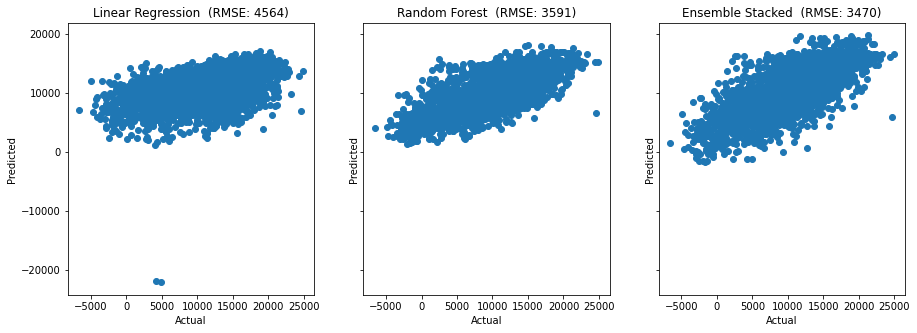

In [36]:
# Choose best model and motivate why it is the best choice
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [lr_model.predict(x_test), rf_model.predict(x_test), s_reg.predict(x_test)]
title = ['Linear Regression','Random Forest', 'Ensemble Stacked']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    #ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

__Model Selection__

Out of the five models that were run the best performing mode is the Ensemble stacked model which takes the Linear Model, Decision Tree and Random Forest as base models and then combines them in the meta learner as a Linear Model. 

## Kaggle Submission

In [37]:
# Ensure test data has been amended like train data 
df_features_comp = feature_engineering(df_test)
display(df_features_comp.head(3))


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_min,Year,Month,Day,Hour,Day_of_week,Season_Spring,Season_Summer,Season_Winter,Day_type_Weekend
0,2018-01-01 00:00:00,5.000000,8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.000000,...,279.15,2018,1,1,0,0,0,0,1,0
1,2018-01-01 03:00:00,4.666667,8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.000000,...,278.15,2018,1,1,3,0,0,0,1,0
2,2018-01-01 06:00:00,2.333333,7,0.0,5.000000,89.0,89.666667,0.0,2.333333,6.666667,...,276.15,2018,1,1,6,0,0,0,1,0


In [38]:
# get the features and target variable
X_comp = df_features_comp[feature_list]

# standardize the numeric columns
X_comp[scale_columns] = scaler.transform(X_comp[scale_columns])
display(X_comp.head(5))

/home/fouldsjo/.virtualenv/paula/lib64/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/fouldsjo/.virtualenv/paula/lib64/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_min,Year,Month,Day,Hour,Day_of_week,Season_Spring,Season_Summer,Season_Winter,Day_type_Weekend
0,1.391298,0.946527,-0.362123,1.001110,1.076095,0.571982,-0.721036,0.677940,-0.565065,0.336851,...,-0.874696,2018,1,1,0,0,0,0,1,0
1,1.211144,0.946527,-0.362123,1.139362,1.164513,0.845947,-1.335491,1.071070,-0.565065,-0.153102,...,-0.983325,2018,1,1,3,0,0,0,1,0
2,-0.049937,0.599000,-0.362123,1.001110,1.164513,1.325386,-1.335491,0.284810,-0.290390,-0.283757,...,-1.200581,2018,1,1,6,0,0,0,1,0
3,0.130218,0.599000,-0.362123,1.139362,1.356084,1.037723,-0.516218,2.250461,-0.290390,0.369515,...,-1.381628,2018,1,1,9,0,0,0,1,0
4,0.850835,0.599000,-0.362123,2.521884,0.118238,0.270621,-0.516218,5.198937,-0.565065,0.728814,...,-0.766068,2018,1,1,12,0,0,0,1,0


In [42]:
# Fit the test data to the Random forest model
test_pred=rf_model.predict(X_comp)
print(test_pred)

[ 9663.769401    6652.33419784  5855.8082539  ... 15212.36453702
 15270.13892663 15317.05724639]


In [43]:
# Ensure predictions are output to load shortfall_3H
output = pd.DataFrame({"time":df_test['time']})
output['load_shortfall_3h']=test_pred   

display(output.head())

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9663.769401
1,2018-01-01 03:00:00,6652.334198
2,2018-01-01 06:00:00,5855.808254
3,2018-01-01 09:00:00,8454.235974
4,2018-01-01 12:00:00,8797.541561


In [44]:
#Output to csv for Kaggle 
output.to_csv("predict_002.csv",index=False)